# Predictive Analysis Using Machine Learning
This notebook demonstrates feature selection, model training, and evaluation.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os

In [34]:
# Load dataset - uncomment and update with your actual file path
file_path = 'your_dataset.csv'  # Replace with your actual CSV file
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    # Create a sample dataset for testing
    df = pd.DataFrame({
        'feature1': np.random.rand(100),
        'feature2': np.random.rand(100),
        'target': np.random.randint(0, 2, size=100)
    })
    print("Sample dataset created.")
print("Dataset shape:", df.shape)
print(df.head())

Sample dataset created.
Dataset shape: (100, 3)
   feature1  feature2  target
0  0.879632  0.317478       0
1  0.411647  0.761270       1
2  0.873709  0.396525       0
3  0.809546  0.873023       1
4  0.172223  0.344338       1


In [35]:
# Data cleaning
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(df.mode().iloc[0])
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   target    100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.1 KB
None


In [36]:
# Feature selection
X = df.drop('target', axis=1)
y = df['target']
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nSelected features:", selected_features.tolist())


Selected features: ['feature1', 'feature2']


c:\Users\Admin\Desktop\nlp\Intership5th_sem\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=5 is greater than n_features=2. All the features will be returned.
  warnings.warn(


In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42)

In [38]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'



Accuracy: 0.35
              precision    recall  f1-score   support

           0       0.29      0.20      0.24        10
           1       0.38      0.50      0.43        10

    accuracy                           0.35        20
   macro avg       0.34      0.35      0.34        20
weighted avg       0.34      0.35      0.34        20



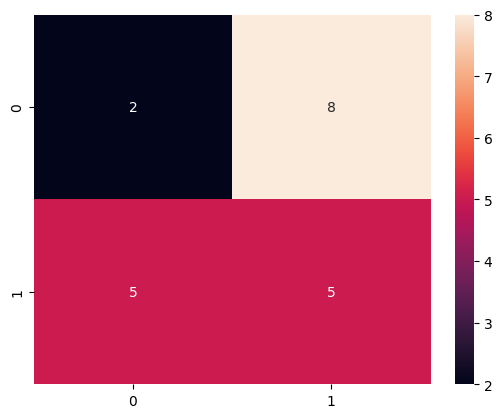

In [40]:
# Evaluation
y_pred = model.predict(X_test_scaled)
print('\nAccuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()